In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import stock_module as sm
import random
import os
import datetime
import time
import openpyxl

In [167]:
stock_name = "JANTS"

### A = working capital / total assets

In [168]:
A = sm.ratio_calculation(stock_name, "WA_to_TotalAssets", term = "12")
A

2009/12    0.009869
2010/12    0.021920
2011/12    0.032031
2012/12    0.199145
2013/12    0.128703
2014/12    0.188416
2015/12    0.175931
2016/12    0.242780
2017/12    0.289315
2018/12    0.271807
2019/12    0.365479
Name: WA_to_TotalAssets, dtype: float64

In [169]:
A = A[-1]
A

0.36547883610580517

### B = retained earnings / total assets

In [170]:
B = sm.ratio_calculation(stock_name, "RetainedEarnings_to_TotalAssets", term = "12")
B

2009/12   -0.025252
2010/12    0.067190
2011/12    0.060313
2012/12    0.093204
2013/12    0.077954
2014/12    0.184275
2015/12    0.073447
2016/12    0.076903
2017/12    0.162383
2018/12    0.167036
2019/12    0.194554
Name: RetainedEarnings_to_TotalAssets, dtype: float64

In [171]:
B = B[-1]
B

0.1945542451174233

### C = earnings before interest and tax / total assets

In [172]:
C = sm.ratio_calculation(stock_name, "ebit_TotalAssets", term = "12")
C

2009/12    0.008935
2010/12    0.047027
2011/12    0.076675
2012/12    0.124360
2013/12    0.178900
2014/12    0.207381
2015/12    0.102510
2016/12    0.069991
2017/12    0.165639
2018/12    0.191130
2019/12    0.170983
Name: ebit_TotalAssets, dtype: float64

In [173]:
C = C[-1]
C

0.17098329414584182

### D = market value of equity / total liabilities

In [174]:
D_2 = sm.ratio_calculation(stock_name, "total_liabilities", term = "12")
D_2

2009/12    109405599.0
2010/12    113543411.0
2011/12    106168355.0
2012/12     59528694.0
2013/12     63405949.0
2014/12     56669737.0
2015/12     67169274.0
2016/12     59426379.0
2017/12     95419278.0
2018/12    129018900.0
2019/12    132362733.0
Name: total_liabilities, dtype: float64

In [175]:
D_2 = D_2[-1]
D_2

132362733.0

In [176]:
D_1 = sm.market_value_specified_date(stock_name, "31-12-2019")
D_1

666000000.0

In [177]:
D = D_1 / D_2
D

5.031627746761621

### E = sales / total assets

In [178]:
E = sm.ratio_calculation(stock_name, "sales_to_totalAssets", term = "12")
E

2009/12    0.336529
2010/12    0.479096
2011/12    0.753936
2012/12    0.962157
2013/12    1.034237
2014/12    0.988681
2015/12    0.900656
2016/12    0.892126
2017/12    1.058645
2018/12    1.269207
2019/12    1.275700
Name: sales_to_totalAssets, dtype: float64

In [179]:
E = E[-1]
E

1.2756995915062783

### ALTMAN Z-Score = 1.2A + 1.4B + 3.3C + 0.6D + 1.0E

In [180]:
Altman_Z_Score = (1.2 * A) + (1.4 * B) + (3.3 * C) + (0.6 * D) + (1.0 * E)

In [181]:
Altman_Z_Score

5.569871656735887

## FUNCTION

In [240]:
def term_func(term:str):
    return f"{term}/12"

def term_date(term:str):
    return f"31-12-{term}"

def convert_Frame(serie):
    return pd.DataFrame(serie)

In [254]:
def altman(stock_name, term="2019"):
    
    term_ = term_func(term)
    termDate = term_date(term)
    
    A = sm.ratio_calculation(stock_name, "WA_to_TotalAssets", "12")
    A = convert_Frame(A)
    A = A.loc[A.index == term_].iloc[0,0]
    
    B = sm.ratio_calculation(stock_name, "RetainedEarnings_to_TotalAssets", "12")
    B = convert_Frame(B)
    B = B.loc[B.index == term_].iloc[0,0]
    
    C = sm.ratio_calculation(stock_name, "ebit_TotalAssets", "12")
    C = convert_Frame(C)
    C = C.loc[C.index == term_].iloc[0,0]
    
    D_1 = sm.market_value_specified_date(stock_name, termDate)
    D_2 = sm.ratio_calculation(stock_name, "total_liabilities", "12")
    D_2 = convert_Frame(D_2)
    D_2 = D_2.loc[D_2.index == term_].iloc[0,0]
    D = D_1 / D_2
    
    E = sm.ratio_calculation(stock_name, "sales_to_totalAssets", "12")
    E = convert_Frame(E)
    E = E.loc[E.index == term_].iloc[0,0]
    
    Altman_Z_Score = (1.2 * A) + (1.4 * B) + (3.3 * C) + (0.6 * D) + (1.0 * E)
    
    scores = {
        "WA_to_TotalAssets"              : A,
        "RetainedEarnings_to_TotalAssets": B, 
        "ebit_TotalAssets"               : C,
        "total_liabilities"              : D,
        "sales_to_totalAssets"           : E,
        "AltmanScore"                    : Altman_Z_Score
    }
    
    return scores

In [260]:
altman("PGSUS", term="2015")

{'WA_to_TotalAssets': 0.20543353396240974,
 'RetainedEarnings_to_TotalAssets': 0.027296539374561432,
 'ebit_TotalAssets': 0.04318490658405683,
 'total_liabilities': 0.6553009016808184,
 'sales_to_totalAssets': 0.8511928850145306,
 'AltmanScore': 1.671619013629687}

In [346]:
def altman_timeSeries(stock_name, start_year, end_year):
    terms = [year for year in range(start_year,end_year+1,1)]
    
    altmanScores = []
    for year in terms:
        altmanScores.append(altman(stock_name, term=str(year))["AltmanScore"])
        
    altmanScores = pd.DataFrame(list(zip(terms, altmanScores)), 
               columns =['Terms', 'AltmanScores'])
    
    altmanScores.index = altmanScores.Terms
    
    altmanScores = altmanScores.drop(['Terms'], axis=1)
    
    return altmanScores
    

In [360]:
serie = altman_timeSeries("BIMAS", 2010, 2019)

In [361]:
serie

,AltmanScores
Terms,
2010,11.326070
2011,9.742927
2012,11.049442
2013,9.825533
2014,9.407430
2015,8.565981
2016,7.526905
2017,7.719250
2018,7.166732


In [364]:
serie = serie.rename(columns = {"AltmanScores": "BIMAS"})

In [365]:
serie

,BIMAS
Terms,
2010,11.326070
2011,9.742927
2012,11.049442
2013,9.825533
2014,9.407430
2015,8.565981
2016,7.526905
2017,7.719250
2018,7.166732


In [ ]:
new_data = data.rename(columns = {"Team": "Team Name", 
                                  "College":"Education", 
                                  "Salary": "Income"}) 

In [359]:
stockNames = sm.get_stock_names()

In [374]:
def altman_Table(stockNames, start_year, end_year):
    series = []
    for stock_name in stockNames:
        serie = altman_timeSeries(stock_name, start_year, end_year)
        serie = serie.rename(columns = {"AltmanScores": stock_name})
        series.append(serie)
        
    series = pd.concat(series, axis=1)
    return series      

In [383]:
testt = altman_Table(["LOGO","KORDS","JANTS"], 2010, 2019)

In [384]:
testt

,LOGO,KORDS,JANTS
Terms,,,
2010,6.812685,2.483328,1.467327
2011,2.835339,2.194376,1.892016
2012,4.830420,2.081695,3.017422
2013,2.694467,1.560290,4.241025
2014,6.983782,1.730906,6.064762
2015,9.148030,1.846879,3.508170
2016,6.212711,1.982354,3.880082
2017,6.506550,2.107508,4.494243
2018,2.960676,1.801260,3.891904


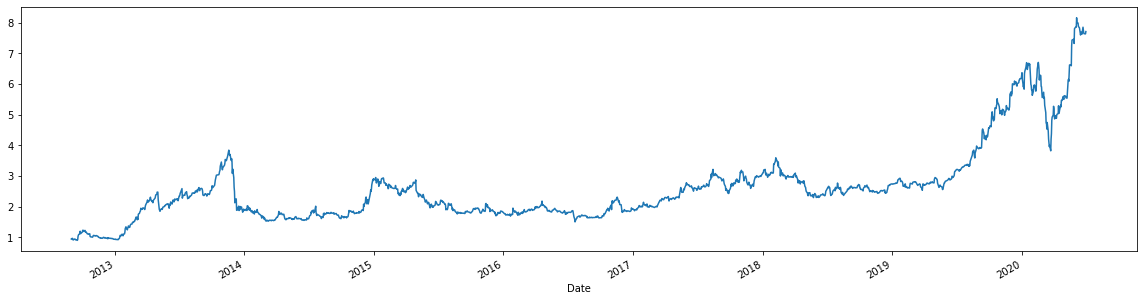

In [387]:
sm.plot_wealth_index("JANTS", "31-12-2010")